In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [190]:
project = pd.read_csv('predict_consume_최종.csv', encoding='euc-kr')
project

,년도,귤도매가격,귤소매가격,오렌지도매가격,오렌지소매가격,생산자물가지수(감귤),소비자물가지수(감귤),1인당 가처분소득,1인당 연간소비량(kg),오렌지가격_1kg,오렌지가공매출_백만원,오렌지가공량_ton,감귤가격_1kg,감귤가공매출_백만원,감귤가공량_ton,감귤처리량
0,1998,10884.666670,11929.333330,21830.00000,45000.0,95.98,80.644,57194.3727,NaN,2310,NaN,13836.0,1326,NaN,5012,500000
1,1999,6206.000000,11933.333330,30530.00000,93240.0,113.29,102.156,58382.7420,NaN,3202,NaN,15070.0,1512,NaN,33142,567041
2,2000,7417.333333,11800.000000,14240.00000,52580.0,58.74,55.410,61964.6448,11.9,1538,188000.0,11375.0,936,NaN,27468,430617
3,2001,6356.000000,11066.666670,17780.00000,51290.0,90.97,79.033,68150.2896,NaN,1898,NaN,10869.0,1194,NaN,47445,527326
4,2002,5312.000000,8866.666667,22410.00000,63440.0,84.83,84.325,75338.7816,13.3,2390,NaN,8229.0,1099,NaN,112359,531081
5,2003,9075.000000,26300.000000,17700.00000,56280.0,57.45,63.620,82105.3168,13.0,1904,NaN,19712.0,900,NaN,120333,477523
6,2004,12609.000000,27000.000000,18720.00000,58280.0,96.77,85.198,90825.8304,12.0,2006,NaN,24065.0,1337,NaN,100517,415338
7,2005,12133.000000,16500.000000,16700.00000,63520.0,143.35,106.735,95684.7528,13.1,1814,NaN,25366.0,1795,NaN,125343,491260
8,2006,13026.000000,31800.000000,18650.00000,63380.0,100.05,84.334,99341.6424,12.7,1998,NaN,26547.0,1426,NaN,109496,450087
9,2007,7101.000000,13100.000000,23090.00000,70610.0,157.50,109.137,107368.2552,16.0,2445,NaN,24101.0,1582,NaN,138782,513746


In [301]:
#project.iloc[:,14]
x_1 = project.drop(labels='감귤가공량_ton',axis=1)

In [302]:

x = x_1.iloc[:,9:15]
y = project.iloc[:,14]

In [304]:
x = x.fillna(np.mean(x))

In [306]:
y

0       5012
1      33142
2      27468
3      47445
4     112359
5     120333
6     100517
7     125343
8     109496
9     138782
10     88664
11    123551
12     81117
13    102899
14     55814
15     92834
16    158371
17     84679
18     56372
19     72460
20     63402
21     60425
Name: 감귤가공량_ton, dtype: int64

In [307]:
pro2 = project.fillna(np.mean(project))

In [310]:
#model.fit(pro2_x,pro2_y)
logreg= LogisticRegression(solver='lbfgs',max_iter=20).fit(x,y)

print('정확도:%.2f'%(logreg.score(x,y)*100),"%")

정확도:81.82 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

In [309]:
pro2.head()
pro2_x = pro2.iloc[:,:15]
pro2_y = pro2.iloc[:,15]

In [194]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


0     500000
13    371826
8     450087
1     567041
15    433650
Name: 감귤처리량, dtype: int64

In [57]:
model = LogisticRegression(solver='lbfgs',max_iter=20)
#model.fit(pro2_x,pro2_y)
logreg= LogisticRegression(solver='lbfgs',max_iter=20).fit(pro2_x,pro2_y)

print('정확도:%.2f'%(logreg.score(pro2_x,pro2_y)*100),"%")

정확도:100.00 %


C:\Users\82105\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\82105\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\82105\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\82105\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\82105\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

In [311]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x,y)

# y_pred = model.predict(x_test)

# print('RandomForestClassifier test 정확도:%.2f'%(model_score(pro2_x,pro2_y)*100),"%")


features = pd.Series(model.feature_importances_,
                    index=x.columns).sort_values(ascending=False)
print(features)

감귤처리량          0.195746
오렌지가격_1kg      0.195238
감귤가격_1kg       0.194451
오렌지가공량_ton     0.194315
오렌지가공매출_백만원    0.114597
감귤가공매출_백만원     0.105653
dtype: float64


In [319]:
model = RandomForestRegressor(n_estimators=100, bootstrap=True, criterion='mse', max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features='auto')
model.fit(x, y)

print('RandomForest test 정확도:%.2f'%(model.score(x, y)*100),"%")

RandomForest test 정확도:88.70 %


In [321]:
# MinMaxScaler + LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(x)

logreg= LogisticRegression(solver='lbfgs',max_iter=20).fit(scaled_data,y)

print('정확도:%.2f'%(logreg.score(scaled_data,y)*100),"%")

정확도:50.00 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [323]:
# Random
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(x)

randomF= RandomForestRegressor(n_estimators=100,max_depth =3,min_samples_leaf=1).fit(scaled_data,y)

print('정확도:%.2f'%(randomF.score(scaled_data,y)*100),"%")

정확도:81.83 %


In [327]:

# z점수
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale, robust_scale, minmax_scale , maxabs_scale
scaler = scale(x)

#scaled_data = scale.fit(x)

logreg= LogisticRegression(solver='lbfgs',max_iter=20).fit(scaler,y)

print("Logi.Regre Z점수 정확도:%.2f" %(logreg.score(scaler,y)*100),"%")
#
scaler = maxabs_scale(x)

#scaled_data = scale.fit(x)

logreg= LogisticRegression(solver='lbfgs',max_iter=20).fit(scaler,y)

print('Logi.Regre maxabs점수 정확도:%.2f'%(logreg.score(scaler,y)*100),"%")
#
scaler = minmax_scale(x)

#scaled_data = scale.fit(x)

logreg= LogisticRegression(solver='lbfgs',max_iter=20).fit(scaler,y)

print('Logi.Regre minmax점수 정확도:%.2f'%(logreg.score(scaler,y)*100),"%")
#
scaler = robust_scale(x)

#scaled_data = scale.fit(x)

logreg= LogisticRegression(solver='lbfgs',max_iter=20).fit(scaler,y)

print('Logi.Regre robust점수 정확도:%.2f'%(logreg.score(scaler,y)*100),"%")

Logi.Regre Z점수 정확도:90.91 %
Logi.Regre maxabs점수 정확도:50.00 %
Logi.Regre minmax점수 정확도:50.00 %
Logi.Regre robust점수 정확도:22.73 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa

ValueError: operands could not be broadcast together with shapes (22,6) (22,) 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44048 missing from c

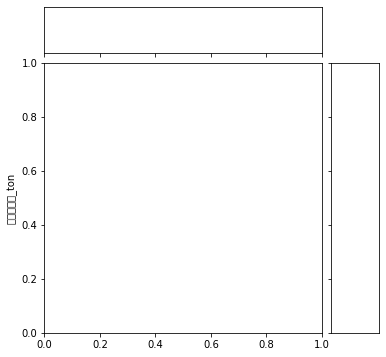

In [338]:
import seaborn as sns
import matplotlib.pyplot as plt
scaler = scale(x)

sns.jointplot(scaler, y)
plt.show()

In [336]:
from sklearn.linear_model import LinearRegression

model_boston = LinearRegression().fit(scaler, y)
model_boston.coef_

print(model_boston.summary())

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [332]:
scaler = scale(x)
logreg= LogisticRegression(solver='lbfgs',max_iter=20).fit(scaler,y)

print("Logi.Regre Z점수 정확도:%.2f" %(logreg.score(scaler,y)*100),"%")

print(logreg.coef_,'\n\n\n', logreg.intercept_)


Logi.Regre Z점수 정확도:90.91 %
[[ 1.28027135e-02 -5.73383617e-03 -5.76023749e-01 -8.17184594e-02
   2.54961803e-04  2.73838123e-01]
 [-9.02603767e-01  2.46798420e-01 -5.02017950e-01 -5.00953398e-01
  -3.06582633e-02 -5.87349231e-02]
 [ 1.02453332e+00  5.07583369e-02 -5.38369508e-01  4.67041811e-02
  -3.85429165e-03  5.72305211e-01]
 [-4.74190968e-01 -6.40292669e-02 -6.01183340e-01 -1.46249027e-01
  -2.05790303e-03  4.78701940e-01]
 [ 6.26083801e-02 -7.54820659e-02  1.74111919e-01  7.61211017e-01
   8.99382203e-01  5.73430003e-02]
 [ 1.67040058e-01  1.50053748e-01  3.90882946e-01  3.04982817e-01
  -6.05813586e-01 -2.03949796e-01]
 [ 2.52828600e-01 -1.09726889e+00 -4.98834247e-02 -3.54005980e-01
  -2.92696116e-01 -1.17282509e-01]
 [ 3.10663966e-01 -7.59012327e-01 -3.72442115e-02  3.83951891e-01
  -4.45247090e-01 -1.75002864e-01]
 [ 9.18932946e-02 -2.94809623e-01  2.80342717e-01  8.98171581e-01
  -5.20913692e-01 -2.71546706e-01]
 [ 5.28914242e-01 -9.18097399e-03  2.33329987e-01 -3.68097953e-0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [328]:
# Random forest scale
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import scale, robust_scale, minmax_scale , maxabs_scale
scaler = scale(x)

RandomF= RandomForestRegressor(n_estimators = 100, random_state=42).fit(scaler,y)

print('RF/ Z_점수 정확도:%.2f'%(RandomF.score(scaler,y)*100),"%")
###########
scaler = robust_scale(x)

RandomF= RandomForestRegressor(n_estimators = 100, random_state=42).fit(scaler,y)

print('RF/ robust 정확도:%.2f'%(RandomF.score(scaler,y)*100),"%")
###########
scaler = minmax_scale(x)

RandomF= RandomForestRegressor(n_estimators = 100, random_state=42).fit(scaler,y)

print('RF/ minmax 정확도:%.2f'%(RandomF.score(scaler,y)*100),"%")
###########
scaler = maxabs_scale(x)

RandomF= RandomForestRegressor(n_estimators = 100, random_state=42).fit(scaler,y)

print('RF/ maxabs 정확도:%.2f'%(RandomF.score(scaler,y)*100),"%")
###########

RF/ Z_점수 정확도:85.21 %
RF/ robust 정확도:85.21 %
RF/ minmax 정확도:85.21 %
RF/ maxabs 정확도:85.21 %


In [185]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import LinearSVR

In [186]:
models = {
    'SVM':LinearSVR(epsilon=1.5,random_state=42),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=2000),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100)
}

cv = KFold(n_splits=5, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=cv)
    print('%s: %.2f%%'% (name, np.mean(scores)*100))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

SVM: -1700.40%
DecisionTreeRegressor: -2907.46%
KNeighborsRegressor: -442.04%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression: 0.00%
RandomForestRegressor: -1200.20%


In [230]:
models = {
    'SVM':svm.SVC(gamma='scale'),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
}

cv = KFold(n_splits=5, random_state=42)
y_pred = model.predict(X_test)

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    print('%s: %.2f%%'% (name, np.mean(scores)*100))
    print('%s: %.2f'%(name,metrics.accuracy_score(y_pred, y_test)*100),"%")

SVM: 0.00%
SVM: 0.00 %
DecisionTreeClassifier: 0.00%
DecisionTreeClassifier: 0.00 %
KNeighborsClassifier: 0.00%
KNeighborsClassifier: 0.00 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa

LogisticRegression: 0.00%
LogisticRegression: 0.00 %
RandomForestClassifier: 0.00%
RandomForestClassifier: 0.00 %


In [228]:
model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('SVM 정확도:%.2f'%(metrics.accuracy_score(y_pred, y_test)*100),"%")

SVM 정확도:0.00 %
